# Assignment 5: PCA and Clustering (40 marks)
### Due: December 6 at 11:59pm 
(Dropbox will remain open until December 8 at 11:59pm)

### Name: SOUMINI MOHANDAS

The purpose of this assignment is to practice using PCA and clustering techniques on a given dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Part 1: Principle Component Analysis (PCA) (18 marks)

### Step 1. Load data (2 marks)

You have been asked by an agricultural company to help them predict the type of wheat based on kernel characteristics. You have been given all the information you need in the seeds_dataset.txt file on D2L. The original dataset can be found [here](https://archive.ics.uci.edu/dataset/236/seeds)

The first step is to read in the file using pandas and inspect the first few columns. Note that the data is in a text file, so the separator is different compared to a csv file.

In [2]:
# Import dataset and inspect the first five columns
file_path = '.\seeds_dataset.txt'
data = pd.read_csv(file_path, sep="\s+", header=None)
print("First five rows of the dataset:\n", data.head())

First five rows of the dataset:
        0      1       2      3      4      5      6  7
0  15.26  14.84  0.8710  5.763  3.312  2.221  5.220  1
1  14.88  14.57  0.8811  5.554  3.333  1.018  4.956  1
2  14.29  14.09  0.9050  5.291  3.337  2.699  4.825  1
3  13.84  13.94  0.8955  5.324  3.379  2.259  4.805  1
4  16.14  14.99  0.9034  5.658  3.562  1.355  5.175  1


Next, you will need to separate the data into your feature matrix and target vector.

In [3]:
# Separate the data into feature matrix and target vector. Print the shape of X and y
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
print("\nFeature matrix shape:", X.shape)
print("Target vector shape:", y.shape)


Feature matrix shape: (210, 7)
Target vector shape: (210,)


### Step 2: Preprocessing (2 marks)

To preprocess the data, we will need to scale the data. Which scaler would you select and why? *(1 mark)* 

ANSWER: 
StandardScaler was selected because it standardizes features by removing the mean and scaling to unit variance, which often improves the performance of many machine learning algorithms.

Before we implement the scaler, we need to split the data into training and testing sets first.

In [4]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Print the shape of the training feature matrix and target vector
print("\nShape of Training Feature Matrix:", X_train.shape)
print("Shape of Training Target Vector:", y_train.shape)


Shape of Training Feature Matrix: (168, 7)
Shape of Training Target Vector: (168,)


Now that we have our training data, we can implement our selected scaler.

In [6]:
# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Step 3: Model Selection (1 mark)

The next step is to instantiate our selected model. In this case, we will be using `LogisticRegression()`

In [7]:
# Instantiate model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

### Step 4: Validation (2 marks)

To validate the results, we need to use cross-validation. To make sure we are using the best hyperparmeters, we can use a grid search. The parameter grid has been provided below.

In [8]:
# The parameter grid has been provided below.
# param_grid = {'C': [0.01, 0.1, 1.0, 10.0],
#             'fit_intercept': [True, False]}

In [9]:
# Implement the grid search and print the best parameters, cross-validation score and test score
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.01, 0.1, 1.0, 10.0], 'fit_intercept': [True, False]}
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
print("\nBest Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)
print("Test Score:", grid_search.score(X_test_scaled, y_test))


Best Parameters: {'C': 10.0, 'fit_intercept': True}
Best Cross-Validation Score: 0.9467023172905525
Test Score: 0.9523809523809523


### Step 5: Visualize using PCA (3 marks)

Now you can visualize the results from Step 4 using PCA. Use the best parameters from the previous step to predict the label for the testing data. For the plot, each data point must be colored based on the class label.

In [10]:
# Visualize the results using PCA
from sklearn.decomposition import PCA

In [11]:
# Predict y labels using best estimator
y_pred = grid_search.predict(X_test_scaled)

In [12]:
# Reduce dimensions of test data for plotting
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test_scaled)

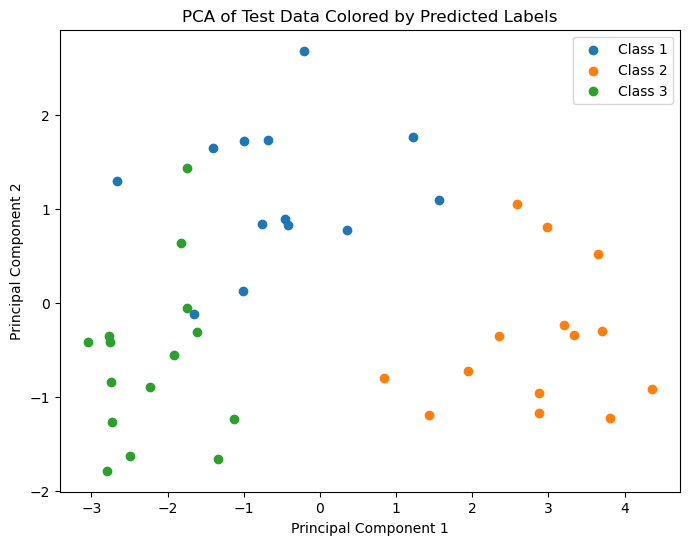

In [13]:
# Plot test points colored by predicted label
plt.figure(figsize=(8, 6))
for i in np.unique(y):
    plt.scatter(X_test_pca[y_pred == i, 0], X_test_pca[y_pred == i, 1], label=f"Class {i}")
plt.title("PCA of Test Data Colored by Predicted Labels")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

#### Questions (4 marks)

01. Did the logistic regression model work well for this dataset? Why would you make this conclusion? *(2 marks)*

ANSWER 01: 
The logistic regression model appears to have worked well for this dataset, given the high cross-validation score of approximately 94.67% and a test score of approximately 95.24%. These scores indicate that the model was able to generalize well from the training data to unseen data. High cross-validation and test scores suggest that the model has a good fit to the data and that it likely did not suffer from overfitting or underfitting.

02. Did PCA work well for this model? How does this relate to the results from the model used? *(2 marks)*

ANSWER 02: 
PCA seems to have worked really well for visualization purposes. The plot shows a clear separation between the classes, especially between Class 2 and the others. Class 1 and Class 3 show some overlap, but they are mostly distinguishable. This separation in the context of reduced dimensionality provided by PCA indicates that the principal components were able to capture significant variance and the underlying structure of the data which are relevant for class separation.
The effectiveness of PCA here is corroborated by the high classification score (i.e., Test Score). This suggests that the variance captured by PCA correlates well with the class distinction that the logistic regression model picked up. If PCA had not worked well, we might expect to see more overlap between classes in the plot and potentially a lower classification score (i.e., Test Score).

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

ANSWER:
I followed the instructions provided in the Notebook without making any modifications, as the process was straightforward. 
I utilized generative AI to understand whether PCA visual analysis solely involves plotting the components or if there exists an additional formula-based equation that generates a numerical score, indicating the quality of the visualization. 
This consideration arises due to the subjectivity of visualization, which can vary among individuals. It is possible that people could present valid arguments suggesting that, for example, in the current plot, the overlap between class 1 and class 3 may render PCA an inadequate metric for classification. 
Nevertheless, this exercise proved valuable as the PCA plot closely aligned with the test scores obtained from the logistic regression model.

## Part 2. Implement clustering (20 marks)

The agricultural company approaches you again because they lost all the labels for their data. Use the Kmeans clustering method to assign labels to the seeds dataset used in Part 1.

### Step 1: Cluster using original data (6 marks)

This part of the assignment asks you to implement Kmeans clustering using the orginal feature matrix (after scaling has been performed). 

In [14]:
# Warning: KMeans is known to have a memory leak on Windows with MKL
# Avoid it by setting the environment variable OMP_NUM_THREADS=1.
import os
os.environ['OMP_NUM_THREADS']='1'

# Import dataset and inspect the first five columns
file_path = '.\seeds_dataset.txt'
data = pd.read_csv(file_path, sep="\s+", header=None)
print("First five rows of the dataset:\n", data.head())

First five rows of the dataset:
        0      1       2      3      4      5      6  7
0  15.26  14.84  0.8710  5.763  3.312  2.221  5.220  1
1  14.88  14.57  0.8811  5.554  3.333  1.018  4.956  1
2  14.29  14.09  0.9050  5.291  3.337  2.699  4.825  1
3  13.84  13.94  0.8955  5.324  3.379  2.259  4.805  1
4  16.14  14.99  0.9034  5.658  3.562  1.355  5.175  1


In [15]:
# Separate the data into feature matrix
X = data.iloc[:, :-1]
print("\nFeature matrix shape:", X.shape)


Feature matrix shape: (210, 7)


In [16]:
# Scale feature matrix
from sklearn.preprocessing import StandardScaler

df_scaled = X.copy()

scaler = StandardScaler()
scaler.fit(df_scaled)
df_scaled = pd.DataFrame(scaler.transform(df_scaled), columns=df_scaled.columns)

The first step is to use the elbow method to determine the optimal number of clusters. In this case, you can use the distortion metric.

C:\Users\soumi\anaconda3\envs\ensf-ml\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\soumi\anaconda3\envs\ensf-ml\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\soumi\anaconda3\envs\ensf-ml\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\soumi\anaconda3\envs\ensf-ml\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarn

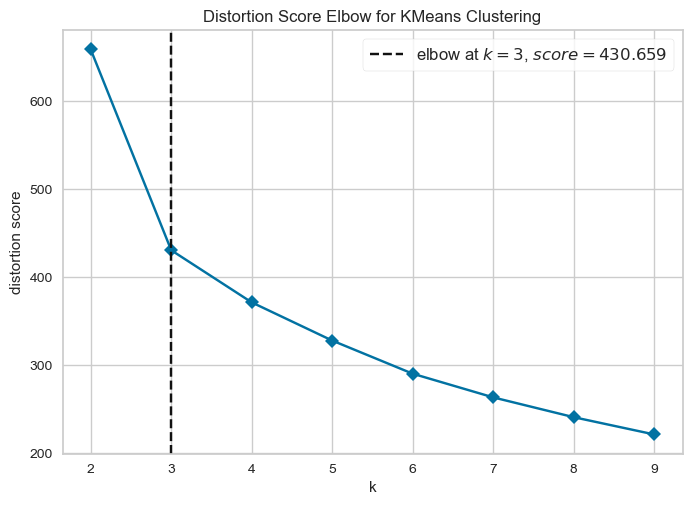

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=9, n_init=10, random_state=54),
                 k=(2, 10), timings=False)

In [17]:
# Use the elbow method to determine the optimal number of clusters
from sklearn.cluster import KMeans
from yellowbrick.cluster.elbow import kelbow_visualizer

# FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4.
# Set the value of `n_init` to 10 explicitly to suppress the warning
kelbow_visualizer(KMeans(random_state=54, n_init=10), df_scaled, k=(2,10), 
                  metric='distortion',
                 timings=False)

NOTE: The UserWarning shown above has been addressed in cell PART 2 - STEP 1. However, the UserWarning keeps popping up every time I run the cell. 

Next, implement Kmeans and calculate the following validation metrics:
- Silhouette score
- Calinski-Harabasz score
- Davies-Bouldin score

In [18]:
# Implement K-means with the number of clusters determined in the previous step
kmeans = KMeans(n_clusters=3, random_state=54, n_init=10)
kmeans.fit(df_scaled)

X['clusters'] = kmeans.labels_
X['clusters'] = X['clusters'].astype('category') #makes seaborn use qualitative color palette

C:\Users\soumi\anaconda3\envs\ensf-ml\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


NOTE: The UserWarning shown above has been addressed in cell PART 2 - STEP 1. However, the UserWarning keeps popping up every time I run the cell. 

In [19]:
# Calculate the three different validation metrics
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
labels = kmeans.labels_
silhouette_avg = silhouette_score(df_scaled, labels)
calinski_harabasz = calinski_harabasz_score(df_scaled, labels)
davies_bouldin = davies_bouldin_score(df_scaled, labels)

Plot the clustering results using PCA. Remember to color each data point based on the cluster label.

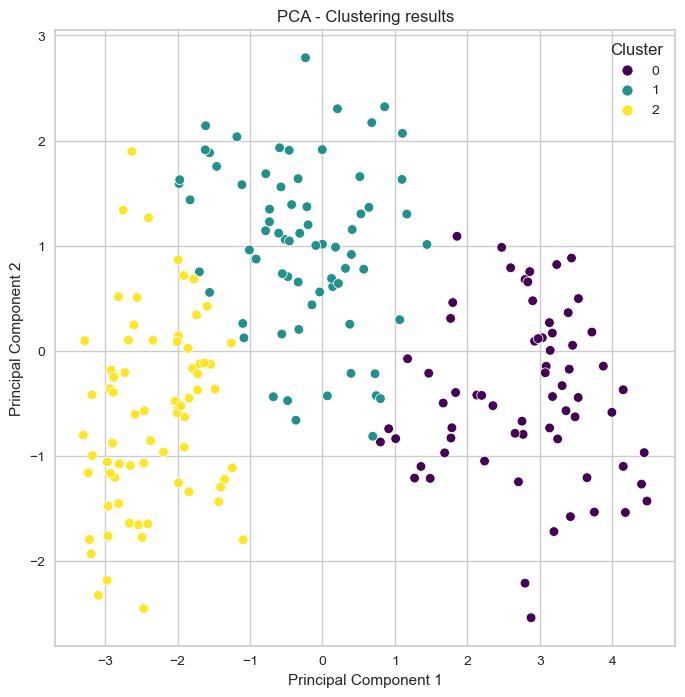

In [20]:
# Plot clustering results
pca = PCA(n_components=2)
df_scaled = pca.fit_transform(df_scaled)
plt.figure(figsize=(8, 8))
sns.scatterplot(x=df_scaled[:, 0], y=df_scaled[:, 1], hue=labels, palette='viridis', legend='full')
plt.title('PCA - Clustering results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

### Step 2: Cluster using PCA-transformed data (4 marks)

Implement Kmeans clustering using PCA-transformed data. The first step is to use the explained variance ratio to find the number of components required to explain at least 95% of the variance.

In [21]:
# Find the number of principal components using explained variance ratio
pca_full = PCA().fit(df_scaled)
explained_variance = pca_full.explained_variance_ratio_.cumsum()
n_components_95 = (explained_variance < 0.95).sum() + 1
n_components_95

2

Next, transform the data using PCA, implement Kmeans and calculate the three validation metrics used in the previous step.

In [22]:
# Use PCA to transform the data
pca = PCA(n_components=n_components_95)
X_pca_95 = pca.fit_transform(df_scaled)

In [23]:
# Implement K-means with the transformed data
kmeans_pca = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_pca.fit(X_pca_95)

C:\Users\soumi\anaconda3\envs\ensf-ml\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, n_init=10, random_state=42)

NOTE: The UserWarning shown above has been addressed in cell PART 2 - STEP 1. However, the UserWarning keeps popping up every time I run the cell.

In [24]:
# Calculate the three different validation metrics
labels_pca = kmeans_pca.labels_
silhouette_avg_pca = silhouette_score(X_pca_95, labels_pca)
calinski_harabasz_pca = calinski_harabasz_score(X_pca_95, labels_pca)
davies_bouldin_pca = davies_bouldin_score(X_pca_95, labels_pca)

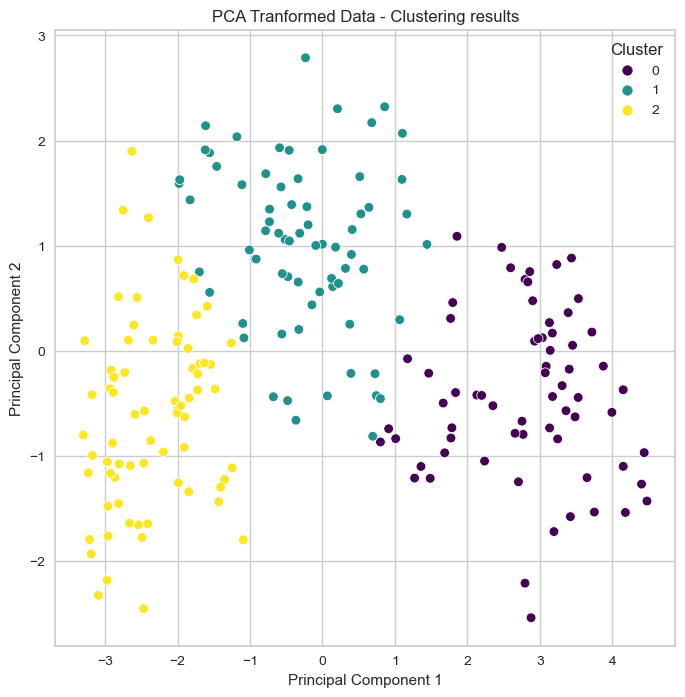

In [25]:
# Plot clustering results
pca = PCA(n_components=2)
X_pca_95 = pca.fit_transform(X_pca_95)
plt.figure(figsize=(8, 8))
sns.scatterplot(x=X_pca_95[:, 0], y=X_pca_95[:, 1], hue=labels, palette='viridis', legend='full')
plt.title('PCA Tranformed Data - Clustering results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

### Step 3: Display results (2 marks)

Print the results for Steps 2 and 3 in a table. Include column and row labels

In [26]:
# Display results
results = {
    'Metric': ['Silhouette Score', 'Calinski-Harabasz Score', 'Davies-Bouldin Score'],
    'Original Data': [silhouette_avg, calinski_harabasz, davies_bouldin],
    'PCA Transformed Data': [silhouette_avg_pca, calinski_harabasz_pca, davies_bouldin_pca]
}
results_df = pd.DataFrame(results)
results_df.set_index('Metric', inplace=True)
print(results_df)

                         Original Data  PCA Transformed Data
Metric                                                      
Silhouette Score              0.400727              0.493430
Calinski-Harabasz Score     249.784175            397.301078
Davies-Bouldin Score          0.927871              0.706673


#### Questions (4 marks)

01. Did the optimal number of clusters make sense based on the context? *(1 mark)*

ANSWER 01:
The Elbow method suggested that the optimal number of clusters is 3. Based on the PCA plots for both original data and the PCA-transformed data, we can see that the data points are grouped into three distinct clusters, which visually supports the choice of three clusters. Also, the class labels are 3 (i.e., 1, 2, and 3 which can be viewed in the seed_data.txt file).

02. Compare the PCA plot from Part 2 step 1 to the PCA plot from Part 1. Did we get similar results? *(1 mark)*

ANSWER 02:
After comparing the 2 plots and viewing the clustering patterns, we see that the clusters appear to be similarly grouped in both plots. Hence, we can conclude that the PCA transformation preserved the structure of the data necessary for clustering.

03. How many components did you use for the PCA analysis? Did using PCA improve your results? Why or why not? *(2 marks)*

ANSWER 03: 
Two components were used for the PCA analysis, as indicated by the axis labels "Principal Component 1" and "Principal Component 2" in the plots.
Using PCA-Transformer data seems to have improved the clustering results. This is evidenced by the higher Silhouette Score and Calinski-Harabasz Score, as well as a lower Davies-Bouldin Score for the PCA-transformed data compared to the original data. The improvement in these metrics suggests that the PCA transformation led to clusters that are more distinct and better separated:
Silhouette Score: Increased from 0.400727 to 0.493430, indicating more cohesive clusters after PCA transformation.
Calinski-Harabasz Score: Increased from 249.784175 to 397.301078, suggesting that the clusters are better defined and more separated.
Davies-Bouldin Score: Decreased from 0.927871 to 0.706673, indicating less overlap between clusters and better clustering structure.

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

ANSWER:
I followed the steps mentioned in this Notebook, and I found them to be quite straightforward, necessitating no alterations on my part.
To calculate the number of components required in the transformed data part to explain a minimum of 95% of the variance, I used the help of generative AI. I was unable to find specific lecture/class/lab notes or notebooks that covered this part, i.e., say a statement or command in which one could specify the required variance percentage & then go ahead with calculating the number of components. Therefore, I sought assistance from generative AI for this aspect. 
Furthermore, I explored online resources to gain insights into how the PCA-transformed data should be visualized, as my results table suggested that PCA-transformed data performed better, yet I struggled to visualize this in my plots. Consequently, I conducted additional research to enhance my understanding of this concept.

## Part 3: Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating
while working on this assignment.

ANSWER:
I thoroughly enjoyed working with the plots; they were both enjoyable and educational in terms of grasping the underlying concepts. However, there was a point of challenge and confusion at the same time when the plots comparing the original data to the PCA-transformed data appeared remarkably similar. This made me question my approach to the problem. I was uncertain about it for the most part. Nonetheless, I found the result table very reassuring, since it demonstrated improved values. This mismatch between visual interpretation and the actual results served as a motivation for me to delve deeper into this subject and gain a better understanding of the concept to help me interpret the results/plots in a much more clear way. 